In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [48]:
run1 = RunManager('StatArbStrategy', 'run_0119', test_periods=0)
run2 = RunManager('StatArbStrategy', 'run_0120', test_periods=0)
run3 = RunManager('StatArbStrategy', 'run_0121', test_periods=0)
run4 = RunManager('StatArbStrategy', 'run_0122', test_periods=0)

In [49]:
run1.import_return_frame()
run2.import_return_frame()
run3.import_return_frame()
run4.import_return_frame()

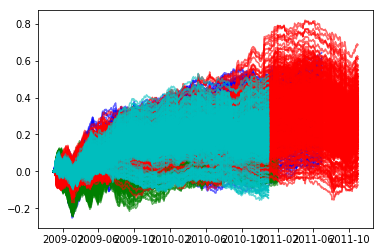

In [51]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum(), 'b', alpha=0.6)
plt.plot(run2.returns.dropna().cumsum(), 'g', alpha=0.6)
plt.plot(run3.returns.dropna().cumsum(), 'r', alpha=0.6)
plt.plot(run4.returns.dropna().cumsum(), 'c', alpha=0.6)
plt.show()

In [44]:
r1 = run5.returns[cols1].mean(axis=1)
r2 = run5.returns[cols2].mean(axis=1)

In [45]:
np.corrcoef(r1, r2)

array([[ 1.        ,  0.96374284],
       [ 0.96374284,  1.        ]])

In [21]:
drop_params = [('model', "{u'type': u'reg'}"), 
               ('score_var', 'boll2_40'),
               ('score_var', 'boll4_160'),
               ('score_var', 'boll_40'),
               ('holding_period', 7)]

# Sector 45
run1 = RunManager('StatArbStrategy', 'run_0092', drop_params=drop_params)
run2 = RunManager('StatArbStrategy', 'run_0107', drop_params=drop_params, test_periods=0)

In [22]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,120,0.783547,0.052606,-999.0
1,holding_period,5,120,0.589311,0.041608,-999.0
2,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",240,0.686429,0.047107,-999.0
3,per_side_count,10,80,0.689188,0.048276,-999.0
4,per_side_count,20,80,0.520482,0.048804,-999.0
5,per_side_count,5,80,0.849617,0.044241,-999.0
6,response_days,10,120,0.659699,0.045596,-999.0
7,response_days,5,120,0.713159,0.048618,-999.0
8,response_type,Simple,240,0.686429,0.047107,-999.0
9,score_var,prma_20,24,0.568908,0.042262,-999.0


In [23]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,80,0.506466,0.042503,-999.0
1,holding_period,3,40,0.606785,0.050010,-999.0
2,holding_period,5,40,0.406146,0.034996,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",80,0.506466,0.042503,-999.0
4,per_side_count,10,40,0.529704,0.037918,-999.0
5,per_side_count,20,40,0.483227,0.047088,-999.0
6,response_days,10,40,0.441470,0.036765,-999.0
7,response_days,5,40,0.571462,0.048241,-999.0
8,response_type,Simple,80,0.506466,0.042503,-999.0
9,score_var,prma_20,8,0.478169,0.042851,-999.0


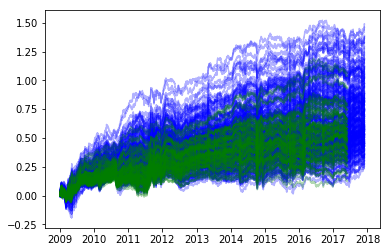

In [24]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum(), 'b', alpha=0.3)
plt.plot(run2.returns.dropna().cumsum(), 'g', alpha=0.3)
plt.show()

In [25]:
comb = CombinationSearch()
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 5
comb.add_run(run1)
comb.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:51<00:00, 10.21s/it]


In [29]:
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 5
comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:47<00:00,  9.43s/it]


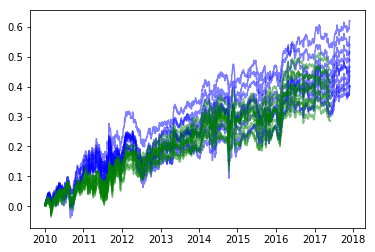

In [30]:
plt.figure()
plt.plot(comb.best_results_returns.dropna().cumsum(), 'b', alpha=0.5)
plt.plot(comb2.best_results_returns.dropna().cumsum(), 'g', alpha=0.5)
plt.show()

In [31]:
df = rollup_returns(comb.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.014398,-0.011434,0.008244,0.104652,0.115859
2011,0.027837,-0.033433,-0.009278,0.022256,0.007383
2012,0.067342,-0.092426,0.010893,0.041918,0.027727
2013,-0.002592,0.034847,0.017710,-0.005728,0.044237
2014,0.065409,0.009080,-0.014009,0.014887,0.075367
2015,0.003359,0.011923,-0.032305,0.055780,0.038757
2016,0.049640,0.023119,0.014778,0.005591,0.093128
2017,0.041715,-0.009297,0.052371,0.029023,0.113812


In [32]:
df = rollup_returns(comb2.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.013620,0.009151,-0.001298,0.036305,0.057777
2011,0.011153,-0.014202,0.010876,0.054005,0.061831
2012,0.056314,-0.036742,0.016532,0.038036,0.074140
2013,-0.000705,0.003930,0.025952,0.020663,0.049840
2014,0.065593,0.027950,-0.040255,0.018270,0.071558
2015,-0.002988,0.014596,-0.006124,0.049271,0.054756
2016,0.062892,0.007137,-0.003609,-0.009186,0.057234
2017,0.021184,-0.033748,NaN,NaN,-0.012565


In [33]:
run1 = RunManager('StatArbStrategy', 'run_0098')
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,312,0.835196,0.044745,-999.0
1,holding_period,5,312,0.853955,0.048972,-999.0
2,holding_period,7,312,0.802405,0.048481,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",468,0.966759,0.055165,-999.0
4,model,{u'type': u'reg'},468,0.694278,0.039634,-999.0
5,per_side_count,10,312,0.877374,0.048997,-999.0
6,per_side_count,20,312,0.761163,0.057216,-999.0
7,per_side_count,5,312,0.853019,0.035986,-999.0
8,response_days,10,468,0.824366,0.046907,-999.0
9,response_days,5,468,0.836671,0.047893,-999.0


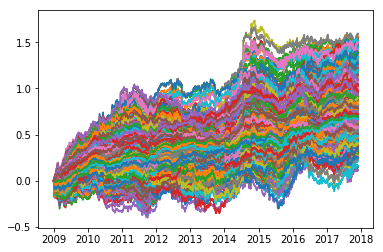

In [36]:
plt.figure()
plt.plot(run1.returns.cumsum())
plt.show()

In [37]:
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 5
comb2.add_run(run1)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:57<00:00, 11.37s/it]


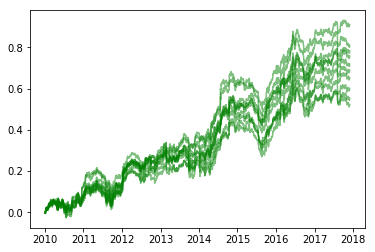

In [38]:
plt.figure()
plt.plot(comb2.best_results_returns.dropna().cumsum(), 'g', alpha=0.5)
plt.show()

In [3]:
# Compare feature_binaries
run1 = RunManager('StatArbStrategy', 'run_0091')
run1.analyze_parameters()

run2 = RunManager('StatArbStrategy', 'run_0108', train_period=0)
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,312,0.473350,0.036880,-999.0
1,holding_period,3,104,0.489131,0.036852,-999.0
2,holding_period,5,104,0.487747,0.038078,-999.0
3,holding_period,7,104,0.443171,0.035711,-999.0
4,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",156,0.561562,0.044769,-999.0
5,model,{u'type': u'reg'},156,0.385138,0.028991,-999.0
6,per_side_count,10,156,0.476886,0.032615,-999.0
7,per_side_count,20,156,0.469814,0.041145,-999.0
8,response_days,10,156,0.490809,0.037923,-999.0
9,response_days,5,156,0.455890,0.035838,-999.0


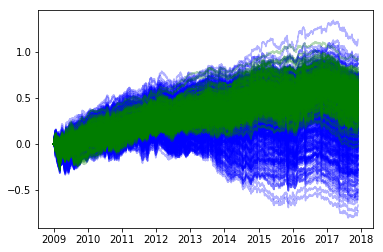

In [4]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum(), 'b', alpha=0.3)
plt.plot(run2.returns.dropna().cumsum(), 'g', alpha=0.3)
plt.show()

In [5]:
comb = CombinationSearch()
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 5
comb.add_run(run1)
comb.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:56<00:00, 11.37s/it]


In [6]:
combA = CombinationSearch()
combA.set_selection_criteria('sharpe')
combA.params['training_epochs'] = 5
combA.add_run(run2)
combA.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:56<00:00, 11.47s/it]


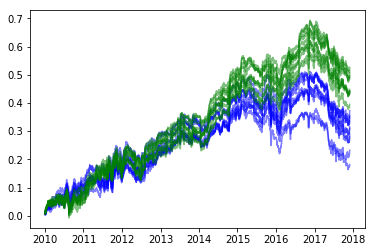

In [7]:
plt.figure()
plt.plot(comb.best_results_returns.dropna().cumsum(), 'b', alpha=0.5)
plt.plot(combA.best_results_returns.dropna().cumsum(), 'g', alpha=0.5)
plt.show()

In [13]:
df = rollup_returns(combA.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.041301,-0.004587,0.018118,0.005786,0.060618
2011,0.052945,0.062160,-0.019895,-0.001369,0.093841
2012,0.056712,-0.037643,0.082668,0.013167,0.114904
2013,0.005117,0.025465,-0.000384,0.009494,0.039691
2014,0.001469,0.079958,0.009421,0.065652,0.156500
2015,0.000508,-0.002037,0.017910,0.022284,0.038664


In [26]:
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('score_var', 'prma_20')]
drop_params = []

runA = RunManager('StatArbStrategy', 'run_0092', drop_params=drop_params)

In [27]:
combA = CombinationSearch()
combA.set_selection_criteria('sharpe')
combA.params['training_epochs'] = 5
combA.add_run(runA)
combA.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:55<00:00, 11.18s/it]


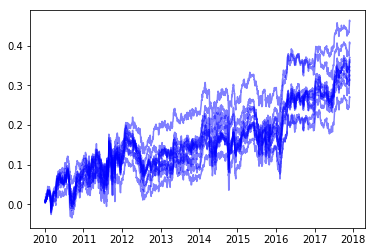

In [28]:
plt.figure()
plt.plot(combA.best_results_returns.dropna().cumsum(), 'b', alpha=0.5)
plt.show()

In [29]:
dfA = rollup_returns(combA.best_results_returns.dropna())
dfA['yr'] = dfA.sum(axis=1)
dfA

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.027274,0.046083,-0.034805,0.037399,0.075951
2011,0.034988,-0.029612,0.015305,0.037387,0.058069
2012,0.024992,-0.044328,-0.021836,0.036550,-0.004621
2013,-0.013647,0.008440,0.007170,0.036644,0.038607
2014,0.047651,0.007600,-0.028319,-0.003968,0.022964
2015,0.025340,-0.003606,-0.057678,0.045156,0.009212
2016,0.050811,0.031597,0.005414,-0.017987,0.069835
2017,0.017850,-0.016198,0.055131,0.010027,0.066809


In [30]:
dfA.mean()

Qtr
1     0.026907
2    -0.000003
3    -0.007452
4     0.022651
yr    0.042103
dtype: float64